In [14]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [16]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [17]:
r = 0.025

In [18]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [19]:
type(stdev)

pandas.core.series.Series

In [20]:
stdev = stdev.values
stdev

array([0.17655045])

In [21]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [22]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [23]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [24]:
S

array([[82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443],
       [82.89017261, 83.36957568, 83.55399228, ..., 82.96343758,
        83.60625751, 81.68055273],
       [83.24337268, 84.00540709, 84.56408216, ..., 83.31950304,
        81.92672878, 82.29719138],
       ...,
       [71.63813753, 92.64287325, 85.60291901, ..., 96.52606156,
        72.60502741, 89.73349164],
       [71.26256548, 93.257031  , 84.59925693, ..., 97.12940144,
        72.98418418, 90.83250899],
       [69.86454181, 93.29370831, 85.03496829, ..., 96.95336226,
        73.30603563, 89.98252462]])

In [25]:
S.shape

(251, 10000)

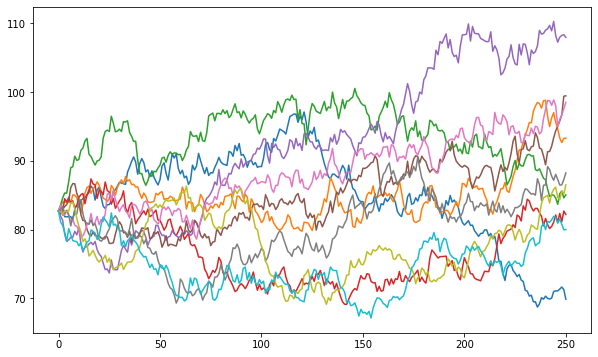

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);